### Configuration

In [1]:
training_data_percentage = 80
test_data_percentage = 20

In [22]:
# Numpy
import numpy as np
from numpy import concatenate, array
from numpy.random import randn
# Decimal precision value to display in the matrix
np.set_printoptions(precision=5, suppress=True)

# Scipy/Scikit
import scipy
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TheilSenRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
from sklearn.linear_model import SGDClassifier
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier

# Matplotlib
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
#mpl.rc('figure', figsize=(10, 8))

# Pandas experiments
import pandas as pd
from pandas import Series, DataFrame, Panel

# Misc
import time
import datetime as dt
import math
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
# import seaborn as sns
print 'All libraries loaded.'

All libraries loaded.


In [3]:
# Read CSV with combined, filtered, and normalized data
feature_df = pd.read_csv('~/code/independent/outputs/combined_df_spline2.csv', delimiter='\t', index_col=('pid','timestamp'))

# Drop the extra unnamed column that has row counters. We don't need it.
feature_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
feature_df

gender  birthyear  age  smoker_status  FND_WTLB   FND_BPS  \
pid     timestamp                                                               
8545332 2006-08-11       0       1924   90       0.500000  0.191439  0.600000   
        2006-11-02       0       1924   90       0.500000  0.195832  0.590000   
        2007-06-05       0       1924   90       0.500000  0.197088  0.750000   
        2010-02-09       0       1924   90       0.500000  0.204620  0.820000   
        2010-08-17       0       1924   90       0.500000  0.203364  0.675000   
        2011-04-13       0       1924   90       0.500000  0.204620  0.730000   
8545333 2007-05-31       0       1941   73       0.000000  0.184534  0.650000   
        2010-06-10       0       1941   73       0.000000  0.221741  0.658833   
        2010-06-10       0       1941   73       0.000000  0.221741  0.658833   
8545336 2010-11-18       0       1928   86       0.000000  0.151896  0.735000   
        2011-09-01       0       1928   86       0.000000  0.141853  0.575000   
8545337 2010-10-29       0       1924   90       0.500000  0.221741  0.600000   
8545338 2007-10-11       0       1948   66       0.000000  0.177002  0.700000   
8545339 2010-05-24       0       1946   68       0.000000  0.338940  0.775000   
        2010-05-24       0       1946   68       0.000000  0.338940  0.775000   
8545340 2007-04-19       0       1926   88       0.000000  0.177002  0.700000   
        2007-10-01       0       1926   88       0.000000  0.311323  0.700000   
        2007-10-09       0       1926   88       0.000000  0.221740  0.658832   
        2008-12-18       0       1926   88       0.000000  0.188300  0.658832   
8545341 2006-12-06       0       1943   71       0.212857  0.229726  0.660000   
        2007-03-26       0       1943   71       0.212857  0.237258  0.590000   
8545342 2007-02-20       0       1931   83       0.500000  0.160683  0.530000   
        2007-07-19       0       1931   83       0.500000  0.160683  0.560000   
8545344 2007-11-26       0       1954   60       1.000000  0.243535  0.640000   
8545345 2009-06-25       0       1950   64       0.500000  0.370324  0.530000   
8545346 2009-01-15       0       1950   64       0.000000  0.160683  0.695000   
8545347 2010-10-29       0       1955   59       0.000000  0.220939  0.615000   
        2010-10-29       0       1955   59       0.000000  0.220939  0.615000   
8545348 2006-08-10       0       1941   73       0.000000  0.247301  0.900000   
        2009-05-04       0       1941   73       0.000000  0.228471  0.685000   
...                    ...        ...  ...            ...       ...       ...   
9581789 2011-09-13       1       1929   85       0.191974  0.283098  0.642659   
9581790 2011-05-06       1       1925   89       0.191974  0.134323  0.600000   
9581791 2011-08-29       1       1928   86       0.191974  0.283099  0.642659   
9581793 2011-09-02       1       1935   79       0.500000  0.283099  0.642659   
        2011-09-02       1       1935   79       0.500000  0.283099  0.642659   
        2011-11-08       1       1935   79       0.500000  0.283100  0.642659   
        2012-02-15       1       1935   79       0.500000  0.283100  0.642659   
        2012-03-01       1       1935   79       0.500000  0.283100  0.642659   
9581799 2011-06-24       1       1926   88       0.191974  0.283101  0.642659   
9581800 2011-01-06       1       1936   78       0.191974  0.283101  0.642659   
        2011-03-08       1       1936   78       0.191974  0.283101  0.642659   
        2011-08-08       1       1936   78       0.191974  0.283102  0.642659   
        2011-10-18       1       1936   78       0.191974  0.283102  0.642659   
        2012-01-24       1       1936   78       0.191974  0.283102  0.642659   
9581801 2011-03-30       1       1942   72       0.191974  0.283103  0.642659   
        2011-07-20       1       1942   72       0.191974  0.283103  0.642659   
        2011-08-16       1       1942   72       0.

## Make training/test data partitions

In [5]:
def get_dataset_partitions(feature_df):
    size_of_dataset = feature_df.shape[0]
    train_size = int(training_data_percentage * size_of_dataset / 100.0)
    test_size = int(test_data_percentage * size_of_dataset / 100.0)

    # Shuffle the rows of the dataframe
    data = feature_df.iloc[np.random.permutation(len(feature_df))]

    training_data = data[:train_size]
    test_data = feature_df[train_size:train_size+test_size]

    X_training = training_data[training_data.columns[:-1]].as_matrix()
    Y_training = training_data[training_data.columns[-1]].as_matrix()
    X_test = test_data[test_data.columns[:-1]].as_matrix()
    Y_test = test_data[test_data.columns[-1]].as_matrix()

    return X_training, Y_training, X_test, Y_test

# Get data partitions
X_training, Y_training, X_test, Y_test = get_dataset_partitions(feature_df)
print '# of features:', X_training.shape[1]
print 'Training data size:', X_training.shape[0]
print 'Test data size:', X_test.shape[0]

# of features: 18
Training data size: 370158
Test data size: 92539


## Feature reduction with PCA

In [6]:
from sklearn.decomposition import PCA

def applyPCA(X):
    pca = PCA(n_components=None)
    X_transformed = pca.fit_transform(X)
    return X_transformed

# X_training = applyPCA(X_training)
# X_test = applyPCA(X_test)

# Applying linear regression

#### Fit the model onto the training data

In [7]:
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# Fit the model
model.fit(X_training, Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predict labels for test data and find RMSE

In [8]:
predicted_labels = model.predict(X_test)

def calc_rsquared(y, yhat):
    rsquare = 0.0
    sse = np.sum(np.square(np.subtract(y,yhat)))
    ybar = np.average(y)
    sst = np.sum(np.square(np.subtract(y,ybar)))
    rsquare = 1.0-(sse/sst)
    return rsquare

rmse = sqrt(mean_squared_error(predicted_labels, Y_test))
print "\nRMSE on test data with LinearRegression =", rmse
print "R-square =", calc_rsquared(Y_test, predicted_labels)


RMSE on test data with LinearRegression = 15.1286295984
R-square = 0.361222811405


### Plot the predicted and the actual eGFR values

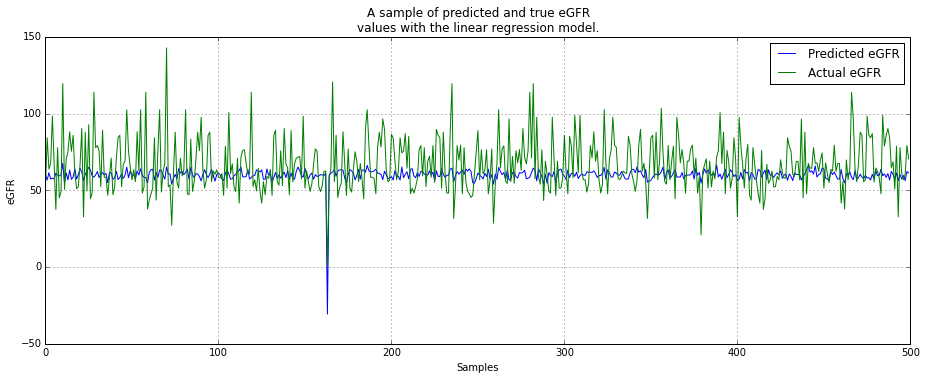

In [9]:
def make_regression_plot(predicted_labels, Y_test, model_name):
    
    figure = plt.figure()
    figure.set_size_inches(15.5, 5.5)
    # Take 300 random samples from the labels
    random_perm = np.random.permutation(500)
    predicted_sample = np.take(predicted_labels, random_perm)
    Y_sample = np.take(Y_test, random_perm)

    plt.plot(predicted_sample, label='Predicted eGFR')
    plt.plot(Y_sample, label='Actual eGFR')
    plt.grid()
    plt.legend()
    plt.xlabel('Samples')
    plt.ylabel('eGFR')
    plt.title("A sample of predicted and true eGFR \nvalues with the " + model_name + " model.")
    plt.show()

make_regression_plot(predicted_labels, Y_test, 'linear regression')

## Apply non-linear regression
### We need to transform the features to a higher-order<br>polynomial so that the model can fit a curve over the training data

In [10]:
# Generate a model of polynomial features
poly = PolynomialFeatures(degree=2)

# Transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
transformed_X_training = poly.fit_transform(X_training)
transformed_X_test = poly.fit_transform(X_test)
print '\nTransformed feature vector dimensions from', X_training.shape[1], 'to', transformed_X_training.shape[1]


Transformed feature vector dimensions from 18 to 190



RMSE on test data with non-linear regression = 13.7708064255
R-square = 0.470740130087


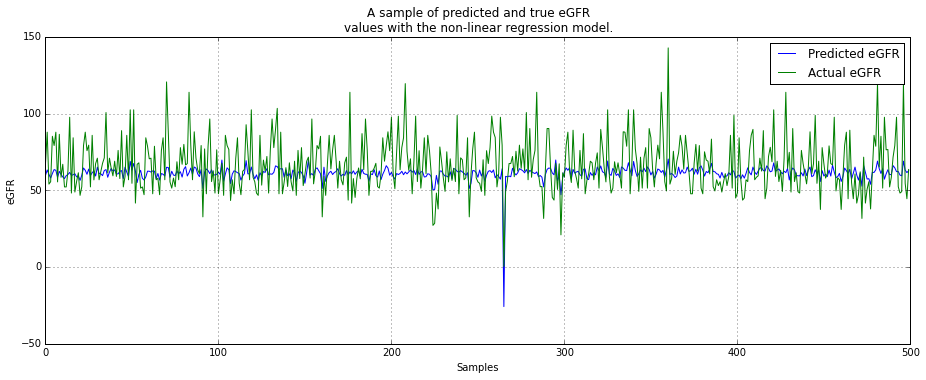

In [11]:
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# Fit the model
model.fit(transformed_X_training, Y_training)

predicted_labels = model.predict(transformed_X_test)
rmse = sqrt(mean_squared_error(predicted_labels, Y_test))
print "\nRMSE on test data with non-linear regression =", rmse
print "R-square =", calc_rsquared(Y_test, predicted_labels)
make_regression_plot(predicted_labels, Y_test, 'non-linear regression')

## Run multiple regression models on multiple <br>permutations of the data and cross-validate
### Models used: Linear regression, Ridge regression, Bayesian ridge regression


Using model: Linear regression
Cross validation complete.
RMSE values: [ 15.12969  15.12748  15.12835  15.12808  15.12632  15.127    15.12275
  15.12826  15.12954  15.12703]
R-squared values: [ 0.36113  0.36132  0.36125  0.36127  0.36142  0.36136  0.36172  0.36125
  0.36115  0.36136]

Mean RMSE = 15.1274504496
Mean R-squared = 0.36132237231


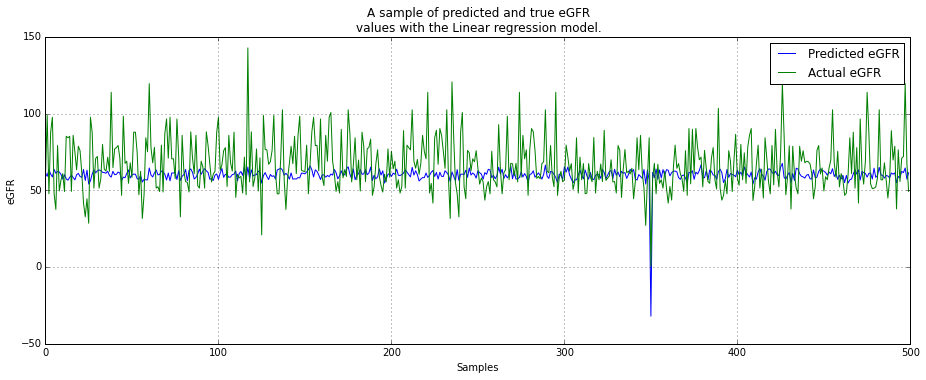


Using model: Ridge regression
Cross validation complete.
RMSE values: [ 15.12872  15.12679  15.12591  15.12692  15.12878  15.12606  15.13122
  15.13034  15.12892  15.12876]
R-squared values: [ 0.36122  0.36138  0.36145  0.36137  0.36121  0.36144  0.361    0.36108
  0.3612   0.36121]

Mean RMSE = 15.1282411235
Mean R-squared = 0.36125560822


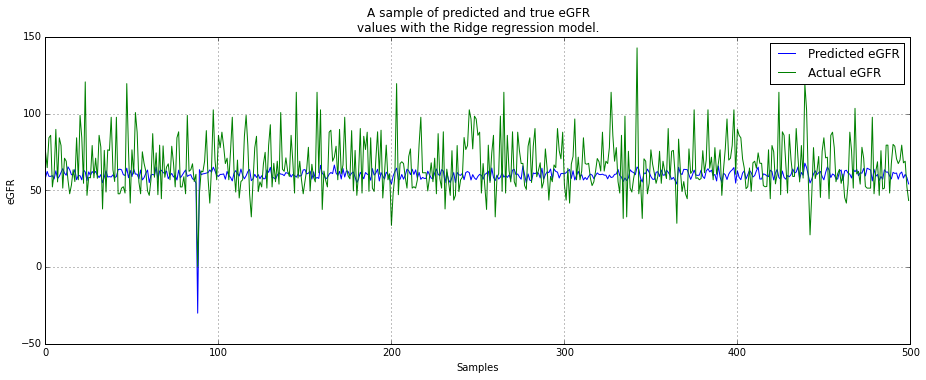


Using model: Bayesian ridge regression
Cross validation complete.
RMSE values: [ 15.13173  15.12794  15.13205  15.13024  15.12879  15.12675  15.1288
  15.12591  15.12937  15.13045]
R-squared values: [ 0.36096  0.36128  0.36093  0.36109  0.36121  0.36138  0.36121  0.36145
  0.36116  0.36107]

Mean RMSE = 15.1292038373
Mean R-squared = 0.361174308198


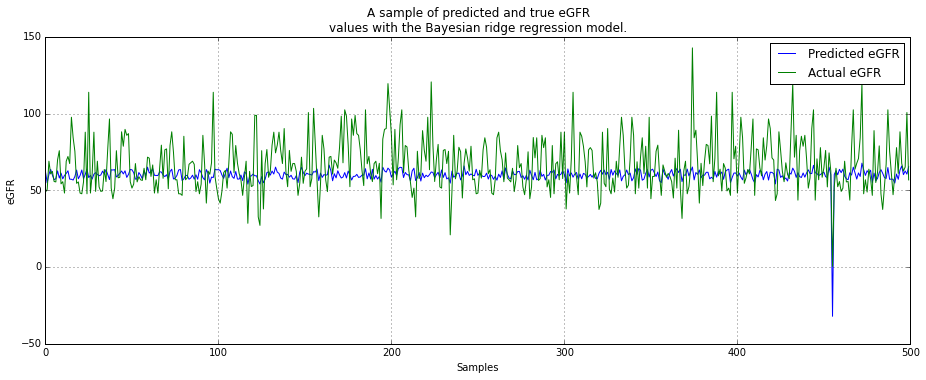

In [12]:
# Run multiple models
model_list = [LinearRegression(fit_intercept=True, normalize=True), Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto'), BayesianRidge()]
model_name_list = ['Linear regression', 'Ridge regression', 'Bayesian ridge regression']


def run_regression_model(regression_model, model_name):
    mean_rmse = 0.0
    mean_rsquared = 0.0
    num_of_iterations = 10
    rmse_list = []
    rsquared_list = []
    
    for i in range(num_of_iterations):
        
        # Get data partitions
        X_training, Y_training, X_test, Y_test = get_dataset_partitions(feature_df)

        # Fit and predict
        regression_model.fit(X_training, Y_training)
        predicted_labels = regression_model.predict(X_test)
        
        # Evaluate
        rsquared = calc_rsquared(Y_test, predicted_labels)
        rsquared_list = np.append(rsquared_list, rsquared)
        
        rmse = sqrt(mean_squared_error(predicted_labels, Y_test))
        rmse_list = np.append(rmse_list, rmse)
        

    mean_rmse = np.average(rmse_list)
    mean_rsquared = np.average(rsquared_list)
    print "Cross validation complete."
    print "RMSE values:", rmse_list
    print "R-squared values:", rsquared_list
    print '\nMean RMSE =', mean_rmse
    print 'Mean R-squared =', mean_rsquared
    
    # Plot
    make_regression_plot(predicted_labels, Y_test, model_name)

    return mean_rmse, mean_rsquared


rmse_list_regression = []
rsquare_list_regression = []
predictions = []
for model, model_name in zip(model_list, model_name_list):
    print "\nUsing model:", model_name
    mean_rmse, mean_rsquared = run_regression_model(model, model_name)
    rmse_list_regression.append(mean_rmse)
    rsquare_list_regression.append(mean_rsquared)

# Classification

### Divide eGFR int ranged classes

In [13]:
num_of_classes = 20

min_egfr = np.amin(feature_df.gfr.values) - 0.01
max_egfr = np.amax(feature_df.gfr.values) + 0.01
print 'Minimum eGFR value =', np.amin(feature_df.gfr.values)
print 'Maximum eGFR value =', np.amax(feature_df.gfr.values)

range_size = (max_egfr - min_egfr)/num_of_classes
print 'Range size =', range_size
class_divisions = np.arange(min_egfr, max_egfr+1, range_size)
print 'Class divisions:', class_divisions
class_label_list = range(1, len(class_divisions))
print 'Class labels: ', class_label_list

Minimum eGFR value = 0.0524911070979
Maximum eGFR value = 198.864200815
Range size = 9.9415854854
Class divisions: [   0.04249    9.98408   19.92566   29.86725   39.80883   49.75042   59.692
   69.63359   79.57517   89.51676   99.45835  109.39993  119.34152
  129.2831   139.22469  149.16627  159.10786  169.04944  178.99103
  188.93262  198.8742 ]
Class labels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


### Assign the classes to the samples (based on the eGFR values)

In [14]:
def assign_class(gfr):
    for class_label, class_div in enumerate(class_divisions):
        if gfr <= class_div:
            return class_label

# Assign classes
classed_gfr = map(assign_class, feature_df.gfr.values)

# Add a feature column to the dataframe
classification_df = feature_df.copy()
classification_df['class_label'] = classed_gfr

# Swap the label and gfr columns
column_list = classification_df.columns.tolist()
column_list[-2] = 'class_label'
column_list[-1] = 'gfr'
classification_df = classification_df[column_list]

print 'Class assignment complete.'

Class assignment complete.


### Partition the dataset for classification

In [15]:
def get_dataset_partitions_classification(feature_df, egfr_column):
    size_of_dataset = feature_df.shape[0]
    train_size = int(training_data_percentage * size_of_dataset / 100.0)
    test_size = int(test_data_percentage * size_of_dataset / 100.0)

    # Shuffle the rows of the dataframe
    data = feature_df.iloc[np.random.permutation(len(feature_df))]
    egfr_column = egfr_column.iloc[np.random.permutation(len(egfr_column))]

    training_data = data[:train_size]
    test_data = feature_df[train_size:train_size+test_size]
    test_egfr = egfr_column[train_size:train_size+test_size]

    X_training = training_data[training_data.columns[:-1]].as_matrix()
    Y_training = training_data[training_data.columns[-1]].as_matrix()
    X_test = test_data[test_data.columns[:-1]].as_matrix()
    Y_test = test_data[test_data.columns[-1]].as_matrix()
    test_egfr = test_egfr.values

    return X_training, Y_training, X_test, Y_test, test_egfr


# Get data partitions
X_training, Y_training, X_test, Y_test, test_egfr = get_dataset_partitions_classification(classification_df.ix[:, :-1], classification_df.ix[:, -1])
print '# of features:', X_training.shape[1]
print 'Training data size:', X_training.shape[0]
print 'Test data size:', X_test.shape[0]

# of features: 18
Training data size: 370158
Test data size: 92539


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model
model.fit(X_training, Y_training)

# Make predictions on the test data
predicted_labels = model.predict(X_test)

Precision = 0.195823663534 
Recall = 0.307794551486 
F-measure = 0.220305001453

RMSE on test data with logistic classification = 20.1321639898
R-squared = -0.223443840964


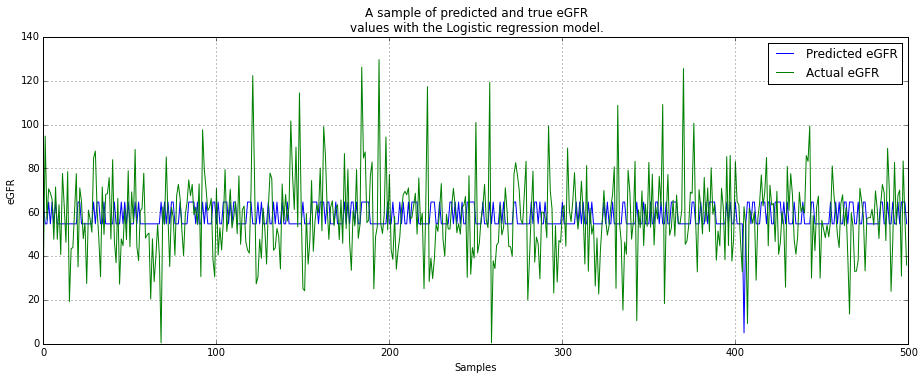

In [20]:
# Calculate precision, recall and f-measure
precision, recall, fscore, support = precision_recall_fscore_support(Y_test, predicted_labels, average='weighted')
print 'Precision =', precision, '\nRecall =', recall, '\nF-measure =', fscore

# Translate the class label to an eGFR value (so we can calculate RMSE)
def get_egfr_from_classlabel(predicted_label):
    # Get the average of the class boundaries
    gfr1 = class_divisions[predicted_label-1]
    gfr2 = class_divisions[predicted_label]
    return (gfr1 + gfr2)/2

predicted_egfr = map(get_egfr_from_classlabel, predicted_labels)

# Calculate RMSE and R-square
rmse = sqrt(mean_squared_error(predicted_egfr, test_egfr))
rsquared = calc_rsquared(test_egfr, predicted_egfr)
print "\nRMSE on test data with logistic classification =", rmse
print "R-squared =", rsquared

# Plot
make_regression_plot(predicted_egfr, test_egfr, "Logistic regression")

## Run multiple classification models

In [23]:
model_list = [LogisticRegression(), ensemble.RandomForestClassifier(), GaussianNB(), SGDClassifier(), LDA(), KNeighborsClassifier()]
model_name_list = ['Logistic regression', 'Random forest classifier', 'Gaussian Naive Bayes classifier', 'Stochastic Gradient Descent', 'LDA', 'KNeighborsClassifier']

def run_classification_model(classifier_model):
    num_of_iterations = 3
    
    avg_precision = 0.0
    avg_recall = 0.0
    avg_fmeasure = 0.0
    
    mean_rmse = 0.0
    mean_rsquared = 0.0
    rmse_list = []
    rsquared_list = []

    for i in range(num_of_iterations):
        
        # Get data partitions
        X_training, Y_training, X_test, Y_test, test_egfr = get_dataset_partitions_classification(classification_df.ix[:, :-1], classification_df.ix[:, -1])

        # Fit and predict
        classifier_model.fit(X_training, Y_training)
        predicted_labels = classifier_model.predict(X_test)

        # Evaluate
        # Calculate precission, recall and f-measure
        precision, recall, fmeasure, support = precision_recall_fscore_support(Y_test, predicted_labels, average='micro')
        avg_precision += precision
        avg_recall += recall
        avg_fmeasure += fmeasure
        
        rsquared = calc_rsquared(Y_test, predicted_labels)
        rsquared_list = np.append(rsquared_list, rsquared)
        
        predicted_egfr = map(get_egfr_from_classlabel, predicted_labels)
        rmse = sqrt(mean_squared_error(predicted_egfr, test_egfr))
        rmse_list = np.append(rmse_list, rmse)

        
    mean_rmse = np.average(rmse_list)
    mean_rsquared = np.average(rsquared_list)

    avg_precision /= num_of_iterations
    avg_recall /= num_of_iterations
    avg_fmeasure /= num_of_iterations

    print "Cross validation complete."
    print 'Precision =', avg_precision, '\nRecall =', avg_recall, '\nF-measure =', avg_fmeasure
    print 'Mean RMSE =', mean_rmse, '\nMean R-squared =', mean_rsquared
    
    return avg_precision, avg_recall, avg_fmeasure, mean_rmse, mean_rsquared


# Run the models
precision_list = []
recall_list = []
fmeasure_list = []
rmse_list = []
rsquared_list = []

for model, model_name in zip(model_list, model_name_list):
    print "\nUsing model:", model_name
    precision, recall, fmeasure, rmse, rsquared = run_classification_model(model)
    
    precision_list.append(precision)
    recall_list.append(recall)
    fmeasure_list.append(fmeasure)
    rmse_list.append(rmse)
    rsquared_list.append(rsquared)


Using model: Logistic regression
Cross validation complete.
Precision = 0.300583177543 
Recall = 0.300583177543 
F-measure = 0.300583177543
Mean RMSE = 20.2432729282 
Mean R-squared = 0.00299423848215

Using model: Random forest classifier
Cross validation complete.
Precision = 0.996124156662 
Recall = 0.996124156662 
F-measure = 0.996124156662
Mean RMSE = 26.4701225049 
Mean R-squared = 0.994838438093

Using model: Gaussian Naive Bayes classifier
Cross validation complete.
Precision = 0.301818692659 
Recall = 0.301818692659 
F-measure = 0.301818692659
Mean RMSE = 26.8642433125 
Mean R-squared = -0.355550640814

Using model: Stochastic Gradient Descent
Cross validation complete.
Precision = 0.100242420313 
Recall = 0.100242420313 
F-measure = 0.100242420313
Mean RMSE = 35.0785225029 
Mean R-squared = -2.84100470549

Using model: LDA
Cross validation complete.
Precision = 0.346682659924 
Recall = 0.346682659924 
F-measure = 0.346682659924
Mean RMSE = 24.4388955595 
Mean R-squared = 0.0

/home/castamere/anaconda2/lib/python2.7/site-packages/sklearn/lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Visualize evaluation results

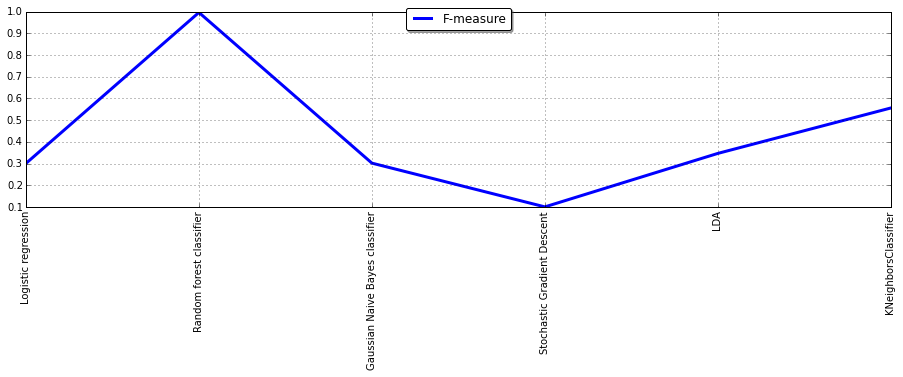

In [24]:
legend_location = 'upper center'
figure = plt.figure()
figure.set_size_inches(15.5, 3.5)
xlabs = range(len(model_name_list))

plt.plot(xlabs, fmeasure_list, label='F-measure',linewidth=3.0)

plt.xticks(xlabs, model_name_list, rotation=90)
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)

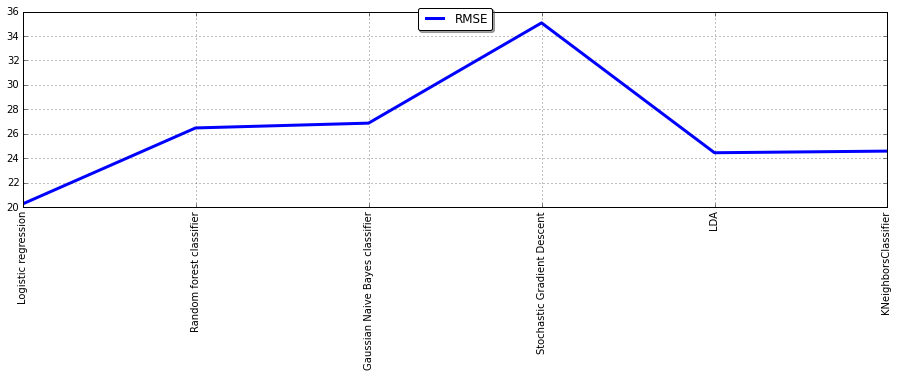

In [25]:
legend_location = 'upper center'
figure = plt.figure()
figure.set_size_inches(15.5, 3.5)
xlabs = range(len(model_name_list))

plt.plot(xlabs, rmse_list, label='RMSE',linewidth=3.0)
plt.xticks(xlabs, model_name_list, rotation=90)
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)

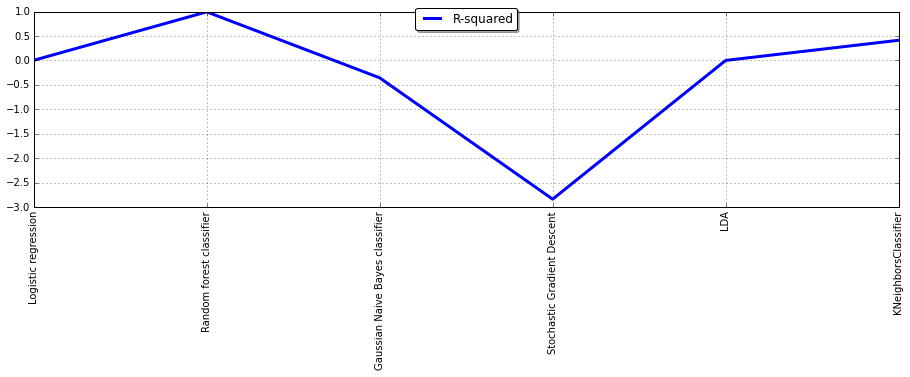

In [26]:
legend_location = 'upper center'
figure = plt.figure()
figure.set_size_inches(15.5, 3.5)
xlabs = range(len(model_name_list))

plt.plot(xlabs, rsquared_list, label='R-squared',linewidth=3.0)
plt.xticks(xlabs, model_name_list, rotation=90)
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)

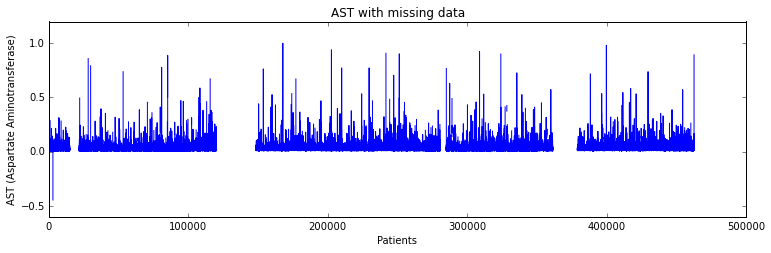

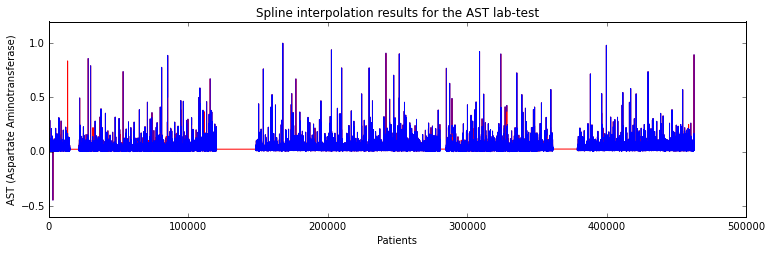

In [28]:
def plot_AST(before, after, title):
    figure = plt.figure()
    figure.set_size_inches(12.5, 3.5)
    if after is not None:
        plt.plot(after, c='r')
    plt.plot(before, c='b')
    plt.xlabel('Patients')
    plt.ylabel('AST (Aspartate Aminotransferase)')
    plt.title(title)
    plt.show()
    
# Read CSV with combined, filtered, and normalized data
beforeinterpolation_df = pd.read_csv('~/code/independent/outputs/combined_df_normalized.csv', delimiter='\t')

before = beforeinterpolation_df.LR_AST.values
after = feature_df.LR_AST.values

plot_AST(before, None, 'AST with missing data')
plot_AST(before, after, 'Spline interpolation results for the AST lab-test')